# Assignment 1

### Imports

In [2]:
import math
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Data Loading

In [3]:
df = pd.read_csv('data/data.csv', header=None, names=[
    'sex', 'length', 'diameter', 'height',
    'whole weight', 'shucked weight', 'viscera weight',
    'shell weight', 'rings'
])

### Table of the distribution of the qualitative variable

In [4]:
number_of_snails = df['sex'].count()
sex_map = {'F': 'Female', 'I': 'Infant', 'M': 'Male'}
sex_count = df['sex'].replace(sex_map).value_counts().to_frame()
sex_count['%'] = round((sex_count['count'] / number_of_snails) * 100, 2) 

In [5]:
sex_count

,count,%
sex,,
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


### Table with summary statistics for the quantitative variables

In [6]:
variables = ['length', 'diameter', 'height',
             'whole weight', 'shucked weight',
             'viscera weight', 'shell weight', 'rings']
stats_list = df[variables].describe().T
stats_list = stats_list[['mean', 'std', 'min',  '25%', '50%', '75%', 'max']]

In [7]:
stats_list

,mean,std,min,25%,50%,75%,max
length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


### Bar chart of the counts of occurrences of each category for the qualitative variable

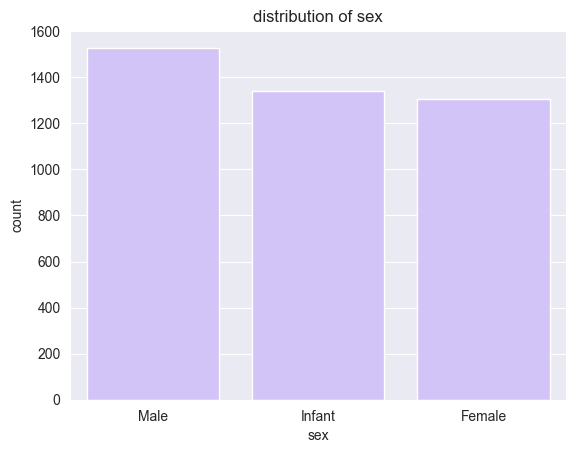

In [18]:
category_genders = df['sex'].replace(sex_map).value_counts()
sns.barplot(category_genders, color=sns.color_palette('pastel')[4])
plt.title('distribution of sex')
plt.ylabel('count')
plt.xlabel('sex')
plt.show()

### Histogram of each quantitative variable

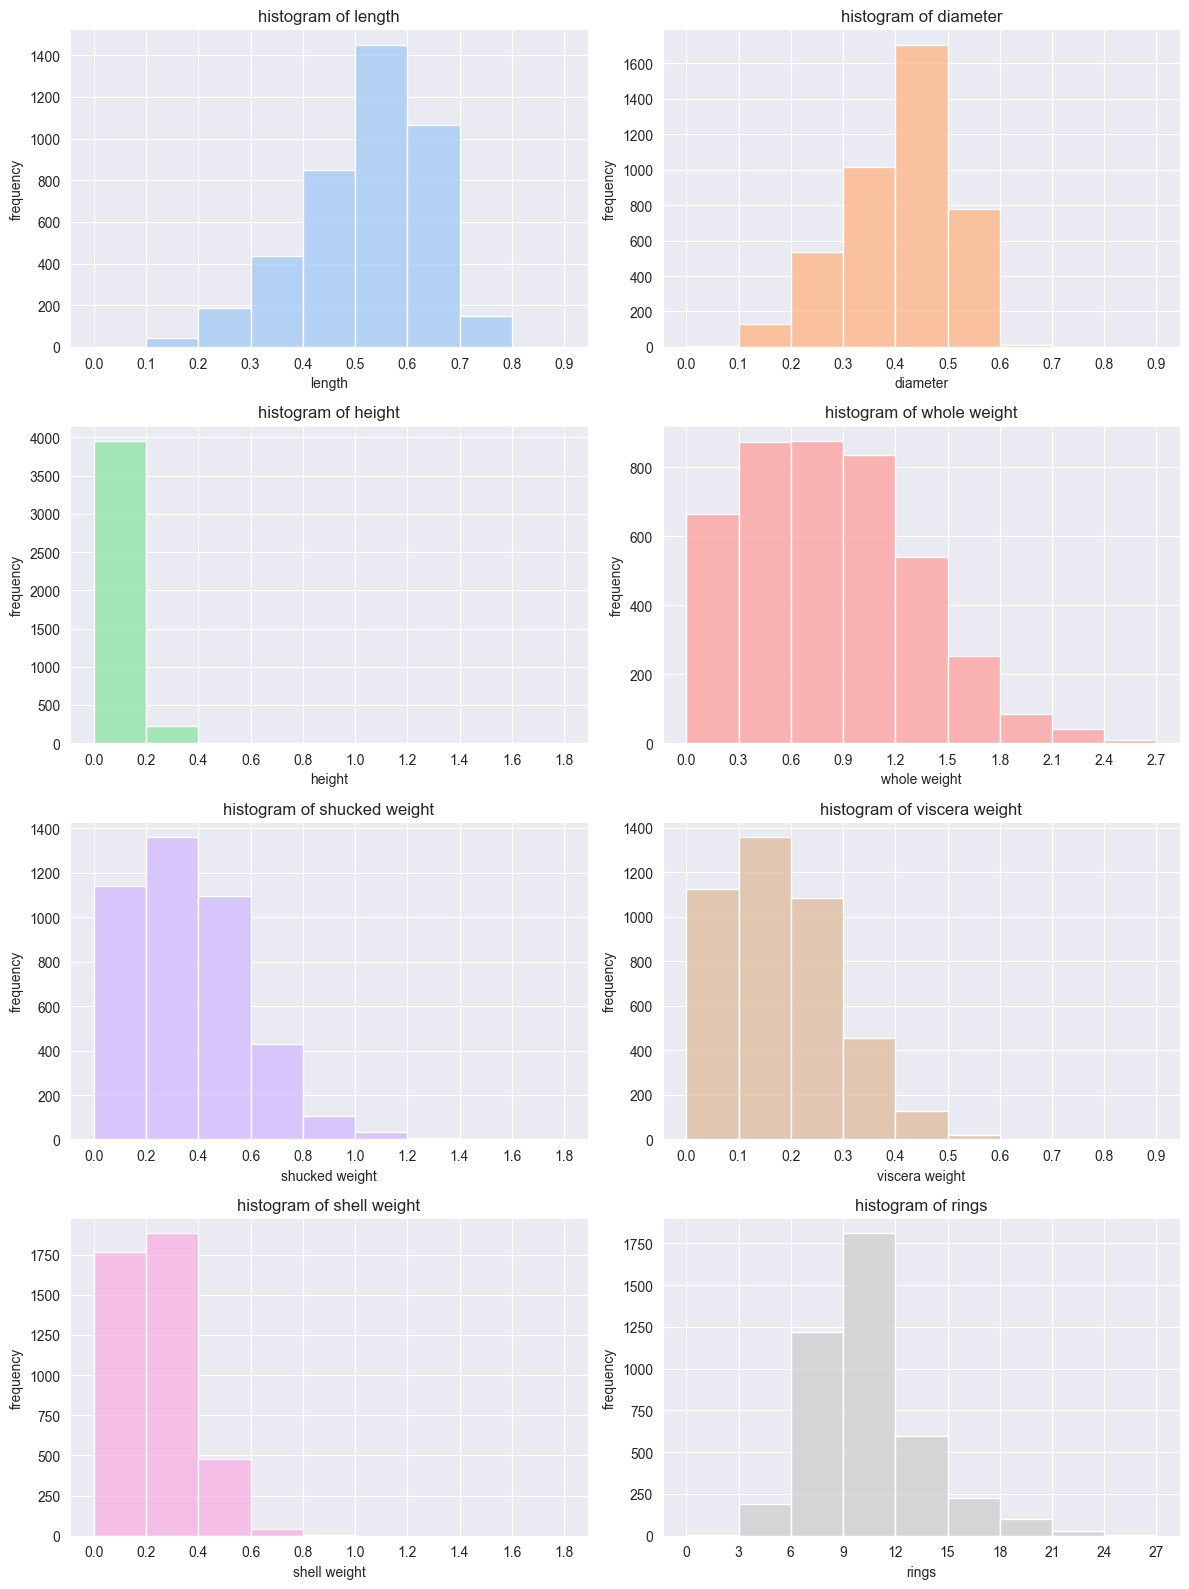

In [9]:
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs = axs.flatten()

for i, var in enumerate(variables):
    max_value = math.ceil(df[var].max())
    step = max_value * 0.1
    if max_value > 10:
        step = math.ceil(max_value * 0.1)
    width = np.arange(0, max_value, step)
    sns.histplot(data=df[var], ax=axs[i], bins=width, color=sns.color_palette('pastel')[i])
    axs[i].set_title(f'histogram of {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('frequency')
    axs[i].set_xticks(width)
    
plt.tight_layout()
plt.show()

### Scatter plot for each pair of the quantitative variables

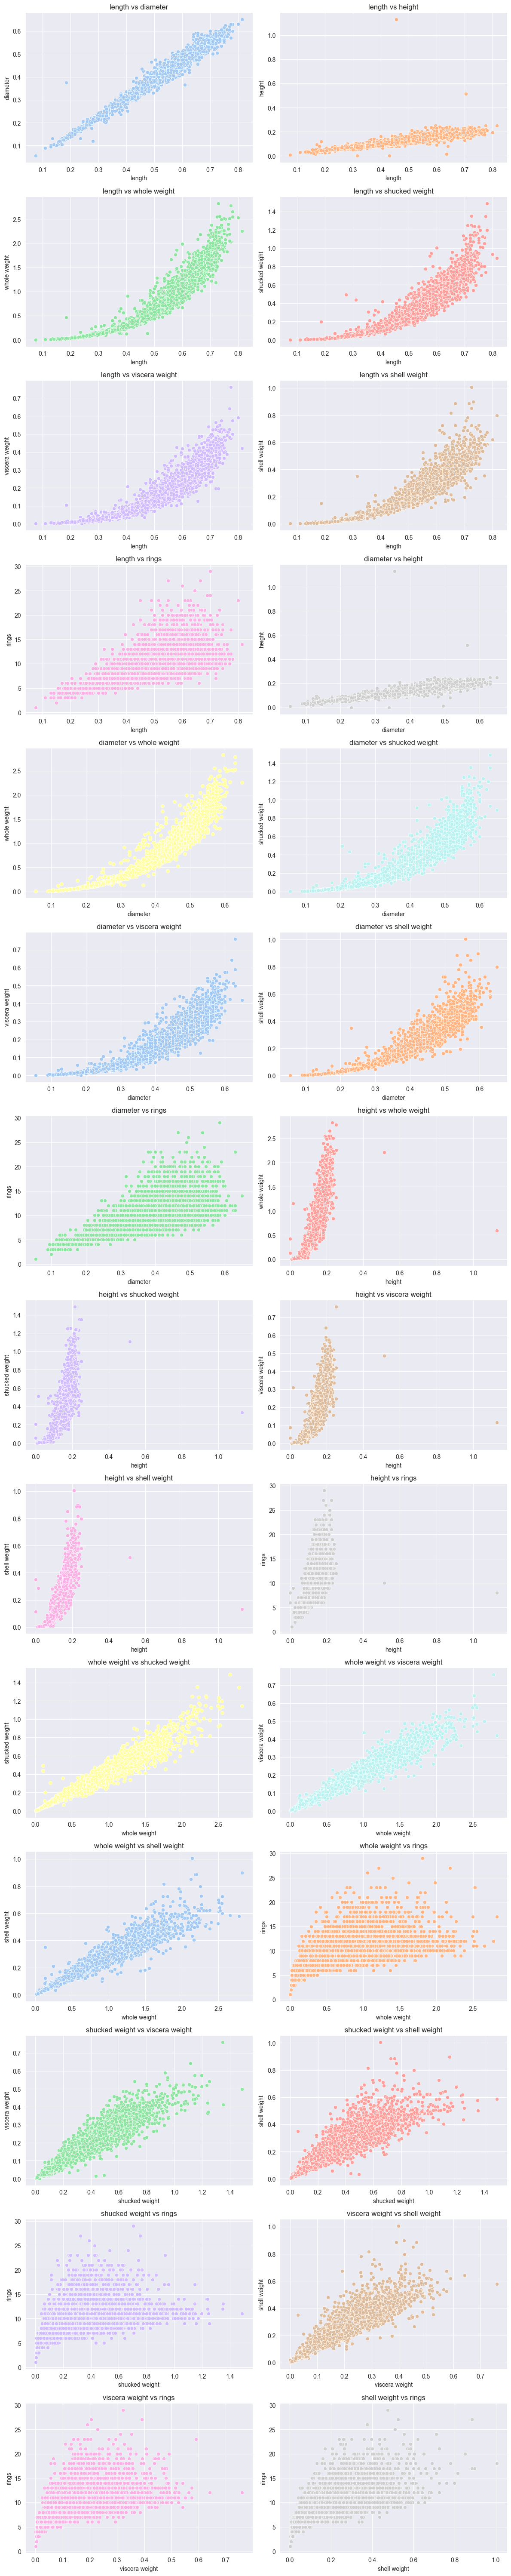

In [10]:
fig, axs = plt.subplots(nrows=14, ncols=2, figsize=(12, 60))
axs = axs.flatten()

plot_index = 0
color_cycle = itertools.cycle(sns.color_palette('pastel'))

for (var1, var2) in itertools.combinations(variables, 2):
    sns.scatterplot(data=df, x=var1, y=var2, ax=axs[plot_index], color=next(color_cycle))
    axs[plot_index].set_xlabel(var1)
    axs[plot_index].set_ylabel(var2)
    axs[plot_index].set_title(f'{var1} vs {var2}')
    plot_index += 1

plt.tight_layout()
plt.show()

### Table representing a linear correlation matrix of all quantitative variables

In [11]:
correlation_matrix = df[variables].corr()

In [12]:
correlation_matrix

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


### Heatmap representing a linear correlation matrix of all quantitative variables

Text(0.5, 1.0, 'correlation matrix')

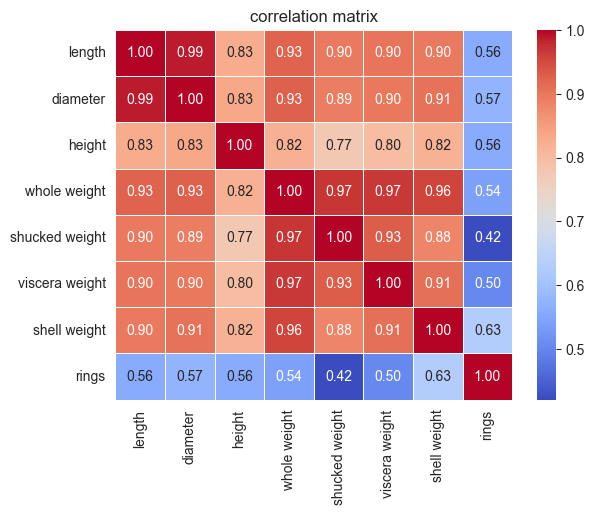

In [21]:
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

### Linear regression plot with the two quantitative variables that are most strongly linearly correlated

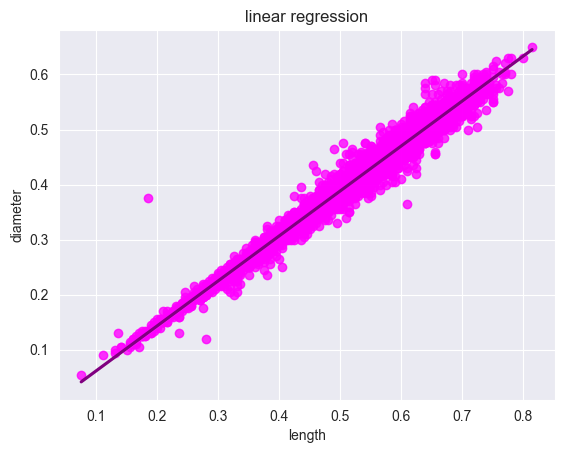

In [14]:
sns.regplot(data=df[variables] ,x='length', y='diameter', color='magenta', line_kws=dict(color="purple"))
plt.title('linear regression');

### Table with summary statistics for the quantitative variables split by the categories of the qualitative variable

In [15]:
summary_list = []
for var in variables:
    summary = df.groupby('sex')[var].describe().reset_index()
    summary = summary[['sex', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
    
    summary['Feature'] = var
    summary['sex'] = summary['sex'].map(sex_map)
    summary_list.append(summary)

summary_df = pd.concat(summary_list)
summary_df = summary_df.rename(columns={'sex': 'Sex'})
summary_df = summary_df.set_index(['Feature', 'Sex'])

In [16]:
summary_df

count       mean       std     min       25%  \
Feature        Sex                                                     
length         Female  1307.0   0.579093  0.086160  0.2750  0.525000   
               Infant  1342.0   0.427746  0.108858  0.0750  0.360000   
               Male    1528.0   0.561391  0.102697  0.1550  0.505000   
diameter       Female  1307.0   0.454732  0.070954  0.1950  0.410000   
               Infant  1342.0   0.326494  0.088109  0.0550  0.270000   
               Male    1528.0   0.439287  0.084398  0.1100  0.395000   
height         Female  1307.0   0.158011  0.039984  0.0150  0.140000   
               Infant  1342.0   0.107996  0.031995  0.0000  0.085000   
               Male    1528.0   0.151381  0.034804  0.0250  0.130000   
whole weight   Female  1307.0   1.046532  0.430316  0.0800  0.730000   
               Infant  1342.0   0.431363  0.286275  0.0020  0.205500   
               Male    1528.0   0.991459  0.470581  0.0155  0.671625   
shucked weight Female  1307.0   0.446188  0.198663  0.0310  0.295000   
               Infant  1342.0   0.191035  0.128405  0.0010  0.090000   
               Male    1528.0   0.432946  0.223000  0.0065  0.276375   
viscera weight Female  1307.0   0.230689  0.097617  0.0210  0.159000   
               Infant  1342.0   0.092010  0.062536  0.0005  0.042500   
               Male    1528.0   0.215545  0.104919  0.0030  0.145875   
shell weight   Female  1307.0   0.302010  0.125649  0.0250  0.213250   
               Infant  1342.0   0.128182  0.084927  0.0015  0.064125   
               Male    1528.0   0.281969  0.130834  0.0050  0.190000   
rings          Female  1307.0  11.129304  3.104256  5.0000  9.000000   
               Infant  1342.0   7.890462  2.511554  1.0000  6.000000   
               Male    1528.0  10.705497  3.026349  3.0000  9.000000   

                            50%        75%      max  
Feature        Sex                                   
length         Female   0.59000   0.640000   0.8150  
               Infant   0.43500   0.510000   0.7250  
               Male     0.58000   0.630000   0.7800  
diameter       Female   0.46500   0.505000   0.6500  
               Infant   0.33500   0.390000   0.5500  
               Male     0.45500   0.500000   0.6300  
height         Female   0.16000   0.175000   1.1300  
               Infant   0.11000   0.130000   0.2200  
               Male     0.15500   0.175000   0.5150  
whole weight   Female   1.03850   1.320250   2.6570  
               Infant   0.38400   0.599375   2.0495  
               Male     0.97575   1.265625   2.8255  
shucked weight Female   0.44050   0.573250   1.4880  
               Infant   0.16975   0.270375   0.7735  
               Male     0.42175   0.566000   1.3510  
viscera weight Female   0.22400   0.297250   0.5900  
               Infant   0.08050   0.130000   0.4405  
               Male     0.21000   0.278000   0.7600  
shell weight   Female   0.29500   0.375000   1.0050  
               Infant   0.11300   0.178500   0.6550  
               Male     0.27600   0.355500   0.8970  
rings          Female  10.00000  12.000000  29.0000  
               Infant   8.00000   9.000000  21.0000  
               Male    10.00000  12.000000  27.0000

### Boxplot of each quantitative variable

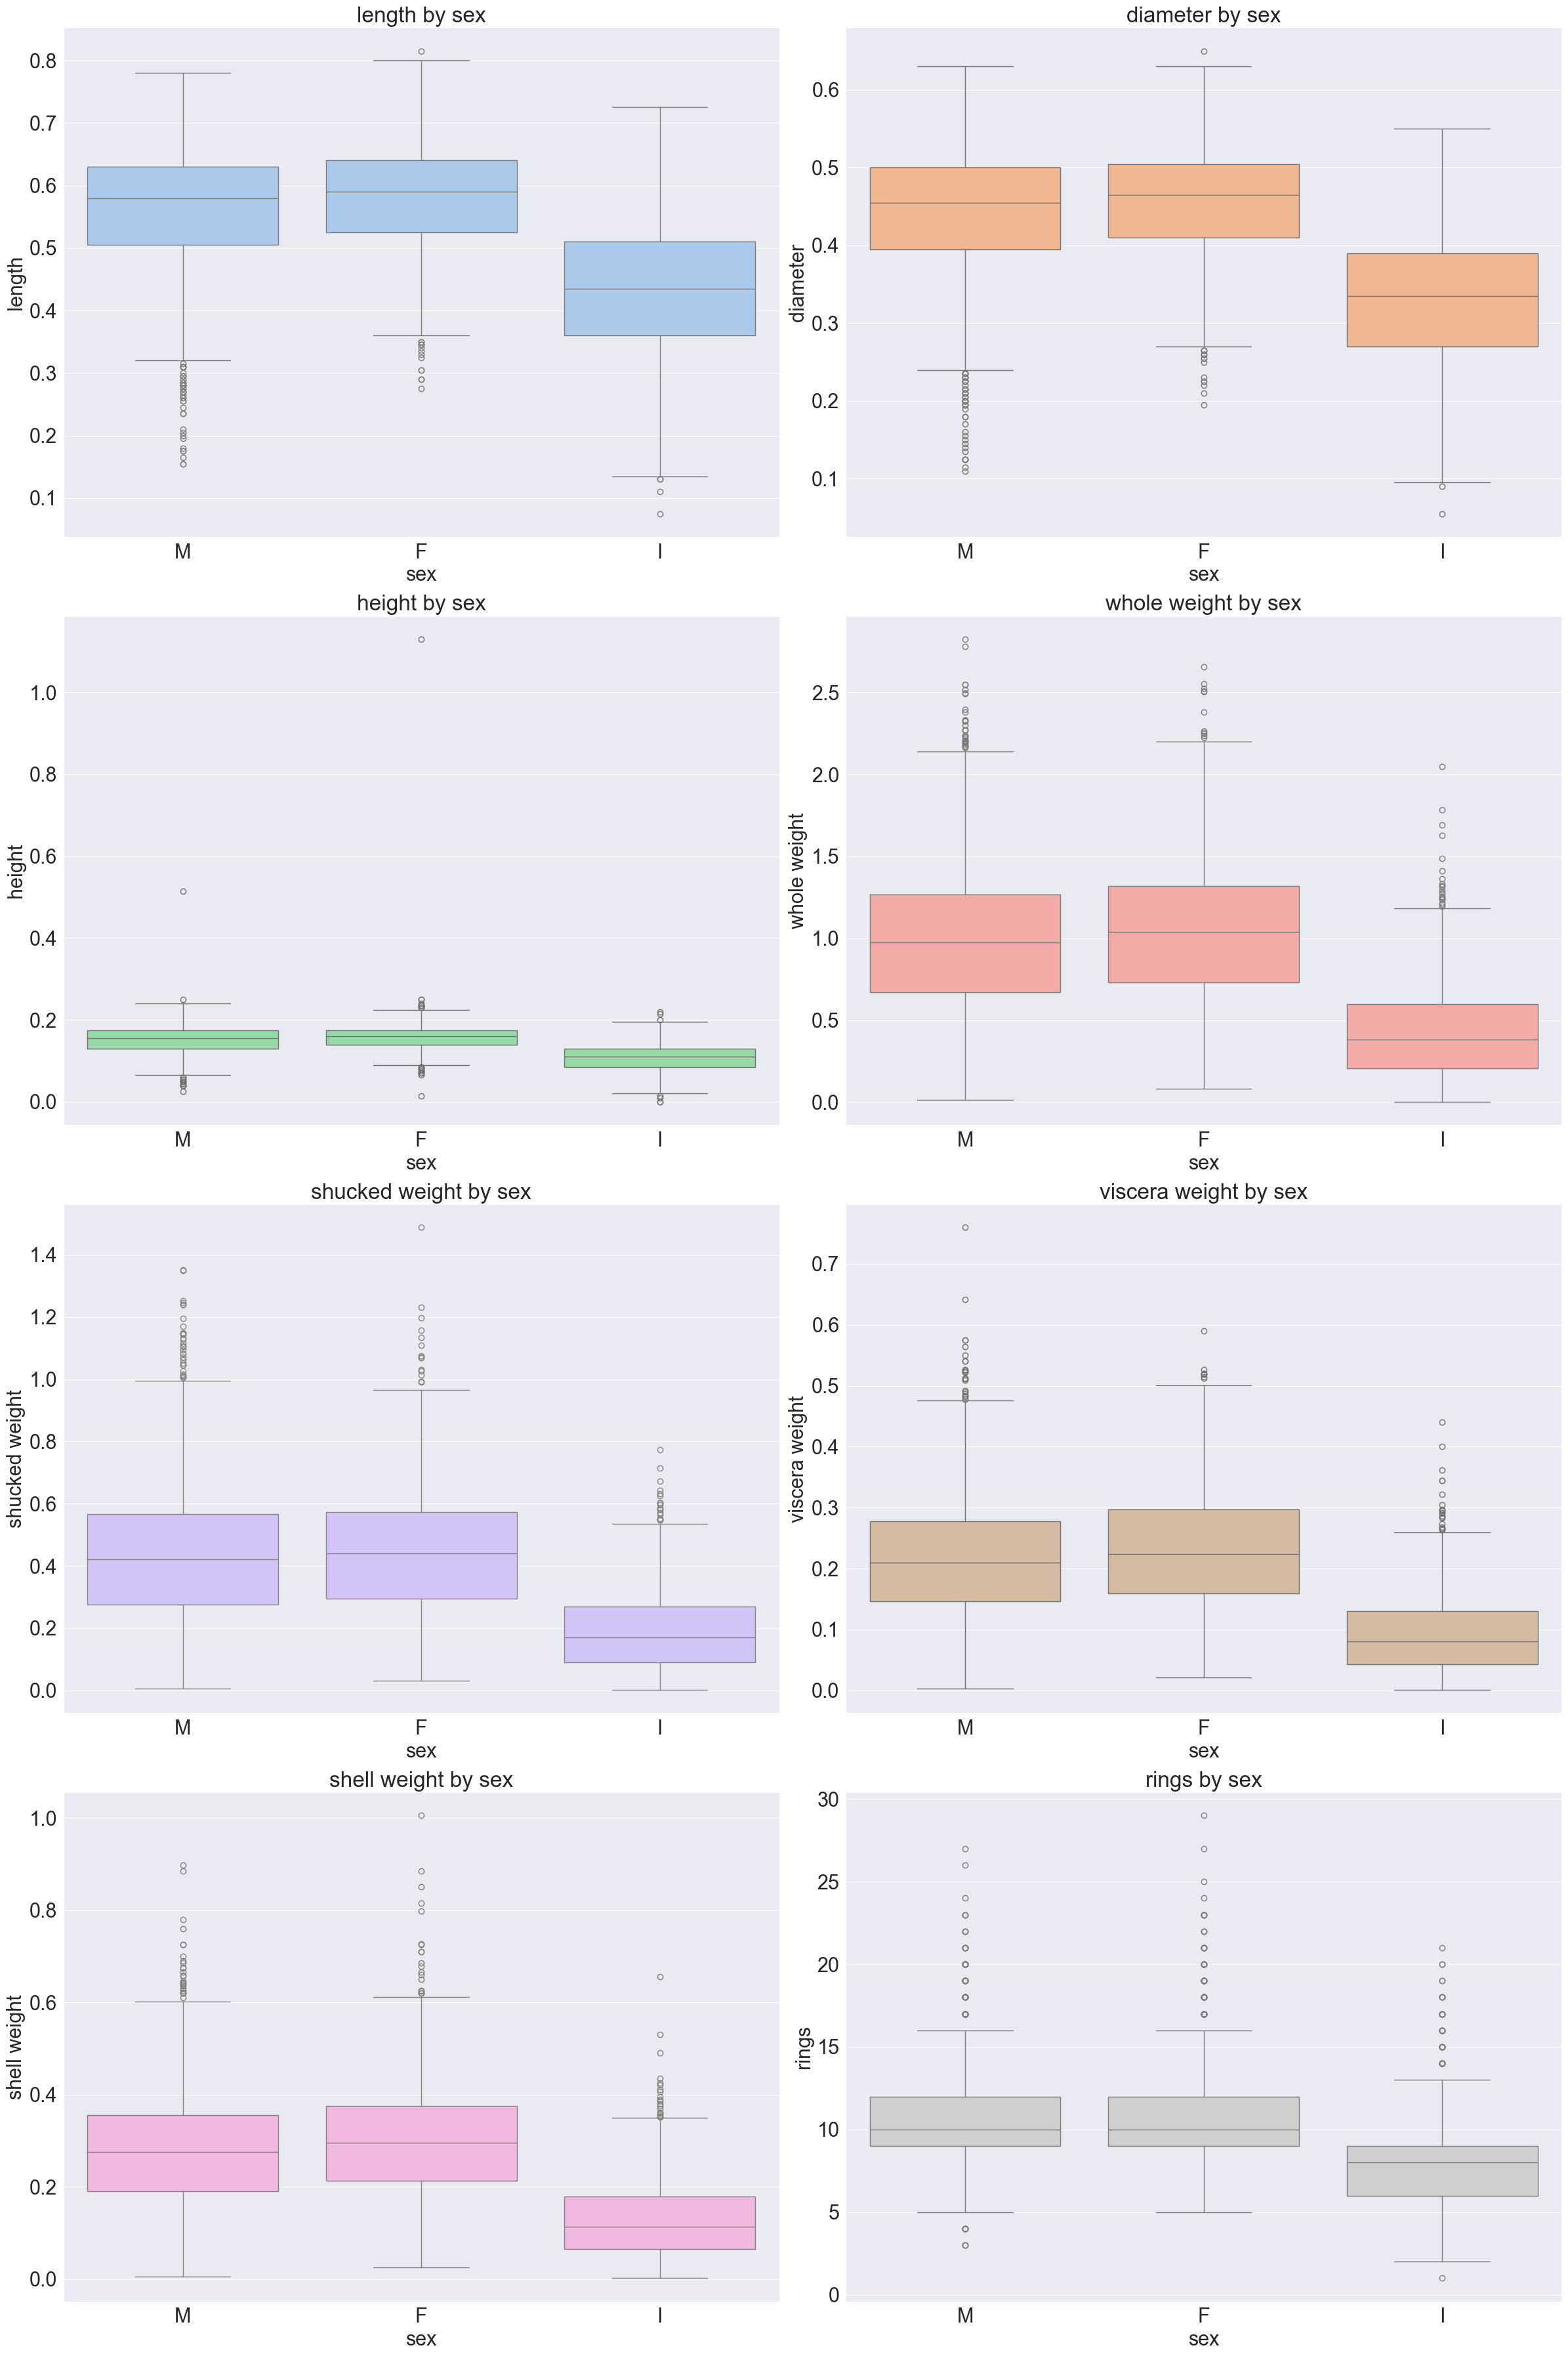

In [17]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(24, 36))
axs = axs.flatten()

for i, var in enumerate(variables):
    sns.boxplot(x='sex', y=var, data=df, ax=axs[i], color=sns.color_palette('pastel')[i])
    axs[i].set_title(f'{var} by sex', fontsize=24)
    axs[i].set_xlabel('sex', fontsize=22)
    axs[i].set_ylabel(var, fontsize=22)
    axs[i].tick_params(axis='x', labelsize=22)
    axs[i].tick_params(axis='y', labelsize=22)

plt.tight_layout()
plt.show()